# <font color='red'> CRISP-DS - CYCLE 01 </font>

# 0.0. IMPORTS

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.core.display import HTML

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading dataset

In [4]:
df_raw = pd.read_csv( 'data/simulated_listings.csv' )

# 1.0. DESCRICAO DOS DADOS

In [7]:
df1 = df_raw.copy()

In [10]:
df1.head()

,apt_id,rooms,garages,useful_area,latitude,longitude,value,interior_quality,time_on_market,sold
0,4435,3.00,1.00,130,-23.55,-46.65,1221160,3,15,0
1,5936,3.00,2.00,99,-23.61,-46.63,1019190,3,50,1
2,1886,2.00,1.00,72,-23.63,-46.69,794247,2,5,0
3,1148,3.00,2.00,115,-23.52,-46.69,811593,2,14,1
4,14529,2.00,1.00,80,-23.59,-46.64,606597,3,15,0


## 1.1. Rename Columns

In [9]:
cols_new = ['apt_id', 'rooms', 'garages', 'useful_area', 'latitude', 'longitude', 'value', 'interior_quality', 'time_on_market', 'sold' ]

# rename
df1.columns = cols_new

## 1.2. Data Dimensions

In [11]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 8966
Number of Cols: 10


## 1.3. Data Types

In [12]:
df1.dtypes

apt_id                int64
rooms               float64
garages             float64
useful_area           int64
latitude            float64
longitude           float64
value                 int64
interior_quality      int64
time_on_market        int64
sold                  int64
dtype: object

## 1.4. Check NA

In [13]:
df1.isna().sum()

apt_id              0
rooms               0
garages             0
useful_area         0
latitude            0
longitude           0
value               0
interior_quality    0
time_on_market      0
sold                0
dtype: int64

## 1.5. Fillout NA

In [14]:
# Central Tendency - mean, mediana
ct1 = pd.DataFrame( df1.apply( np.mean ) ).T
ct2 = pd.DataFrame( df1.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( df1.apply( np.std ) ).T
d2 = pd.DataFrame( df1.apply( min ) ).T
d3 = pd.DataFrame( df1.apply( max ) ).T
d4 = pd.DataFrame( df1.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df1.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df1.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,apt_id,2.00,17929.00,17927.00,8938.48,8939.50,5165.66,0.01,-1.19
1,rooms,1.00,8.00,7.00,2.91,3.00,0.93,-0.21,-0.25
2,garages,1.00,15.00,14.00,2.23,2.00,1.38,1.61,4.57
3,useful_area,24.00,1700.00,1676.00,169.61,127.00,135.97,2.65,11.56
4,latitude,-23.65,-23.49,0.16,-23.58,-23.58,0.03,0.09,-0.73
5,longitude,-46.74,-46.57,0.17,-46.67,-46.67,0.03,0.06,0.16
6,value,190251.00,47735900.00,47545649.00,1975384.75,1246635.00,2478707.26,5.45,50.15
7,interior_quality,1.00,3.00,2.00,2.54,3.00,0.67,-1.13,0.03
8,time_on_market,0.00,180.00,180.00,52.00,41.00,42.77,0.94,0.11
9,sold,0.00,1.00,1.00,0.55,1.00,0.50,-0.21,-1.96


## 1.6. Change Data Types

## 1.7. Descriptive Statistics

### 1.7.1. Numerical Attributes

### 1.7.2. Categorical Attributes

# 2.0. FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

## 2.2. Criacao das Hipoteses

## 2.3. Lista Final de Hipoteses

## 2.4. Feature Engineering

# 3.0. FILTRAGEM DAS VARIAVEIS

In [16]:
df3 = df2.copy()

## 3.1. Filtragem das Linhas

## 3.2. Selecao das Colunas

# 4.0. ANALISE EXPLORATORIA DE DADOS

In [20]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

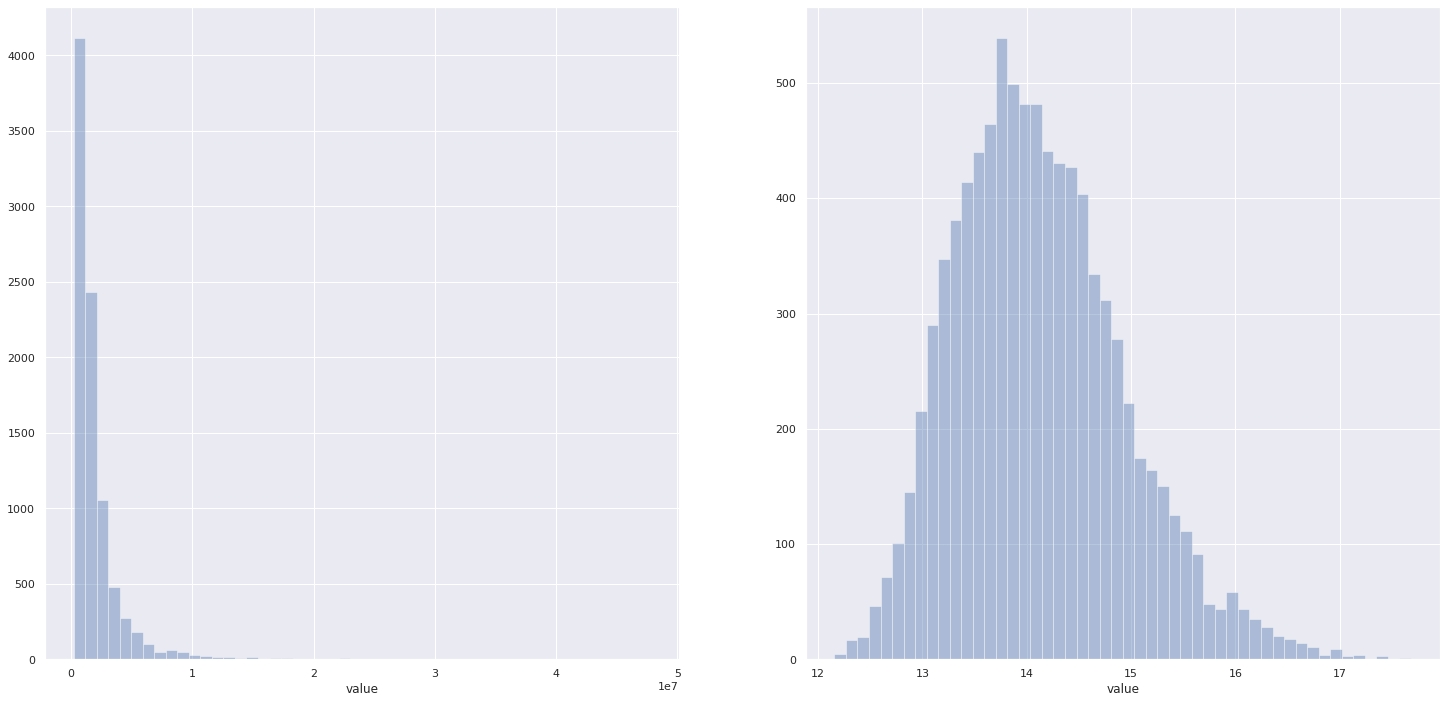

In [36]:
plt.subplot( 1, 2, 1 )
sns.distplot( df4['value'], kde=False );

plt.subplot( 1, 2, 2 )
sns.distplot( np.log1p( df4['value'] ), kde=False );

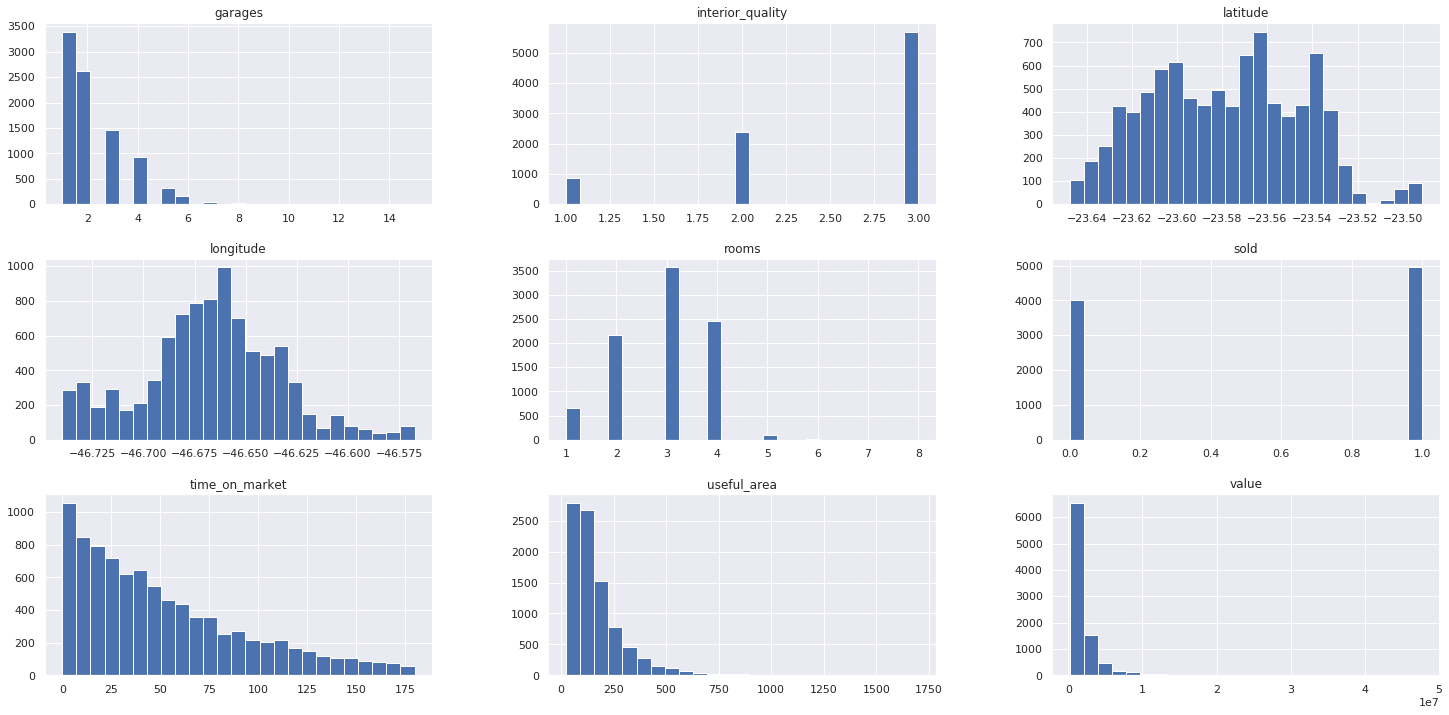

In [37]:
df4.hist( bins=25 );

## 4.2. Analise Bivariada

## 4.3. Analise Multivariada

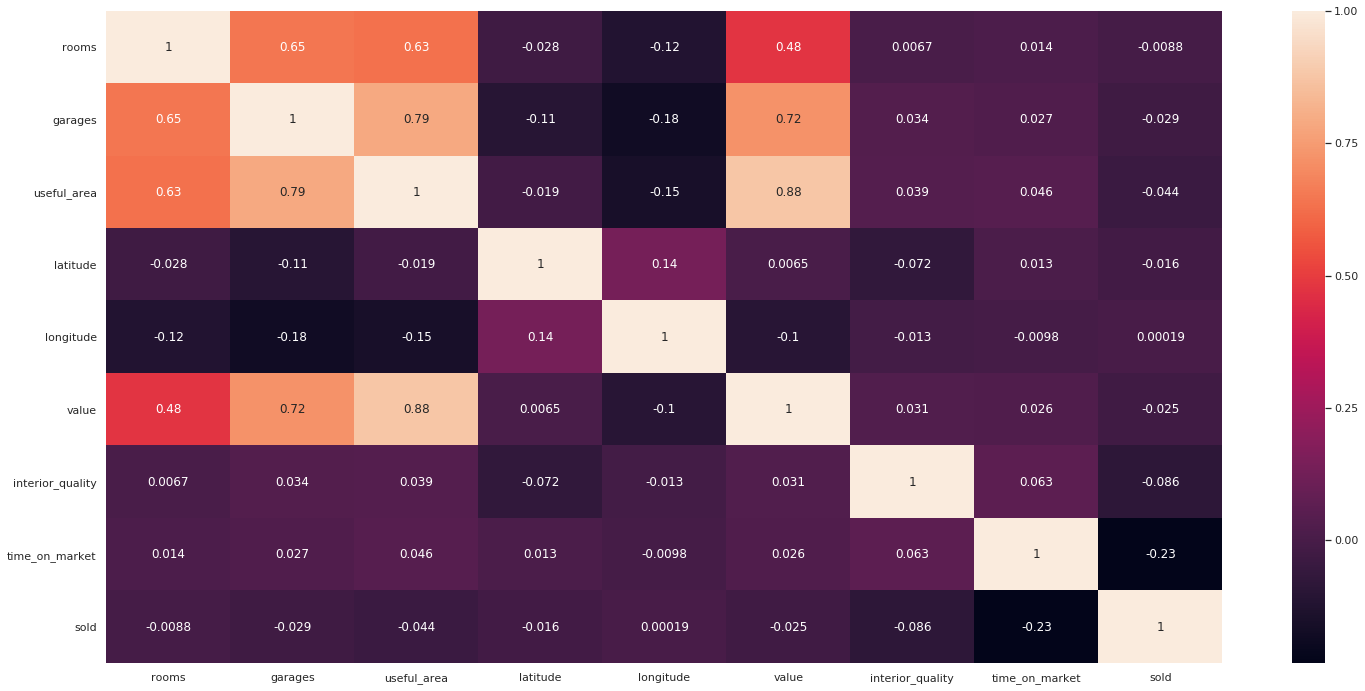

In [39]:
correlation = df4.corr( method='pearson' )
x = sns.heatmap( correlation, annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

# 5.0. PREPARACAO DOS DADOS

In [21]:
df5 = df4.copy()

## 5.1. Normalizacao

In [22]:
ss = StandardScaler()

# time on market
df5['time_on_market'] = ss.fit_transform( df5[['time_on_market']].values )

## 5.2. Rescaling

In [23]:
rs = RobustScaler()
mms = MinMaxScaler()

# rooms
df5['rooms'] = mms.fit_transform( df5[['rooms']].values )

# garages
df5['garages'] = mms.fit_transform( df5[['garages']].values )

# useful_area
df5['useful_area'] = mms.fit_transform( df5[['useful_area']].values )

# interior quality
df5['interior_quality'] = mms.fit_transform( df5[['interior_quality']].values )

# time on market
df5['time_on_market'] = mms.fit_transform( df5[['time_on_market']].values )

## 5.3. Transformacao

### 5.3.1. Transformacao da Variavel Resposta

In [24]:
df5['value'] = np.log1p( df5['value'] )

# 6.0. FEATURE SELECTION

In [25]:
df6 = df5.copy()

## 6.1. Split dataframe into Training and Test dataset

In [26]:
X = df6.drop( 'value', axis=1 )
y = df6['value']

# training and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2 )

# 7.0. MACHINE LEARNING MODELLING

## 7.1. Average Model

In [ ]:
aux1 = X_test.copy()
aux1['value'] = y_test.copy()

# prediction
aux2 = aux1[['value']].mean().reset_index().rename( columns={'value': 'predictions'} )

## 7.2. Linear Regression Model

## 7.3. Linear Regression Regularized Model - LASSO

## 7.4. Random Forest Regressor

## 7.5. XGBoost Regressor

## 7.6. Gradient Boost Model Regressor

## 7.7. Compare Model's Performance

# 8.0. HYPERPARAMTER FINE TUNNING

## 8.1. Random Search

## 8.2. Final Model

# 9.0. TRADUCAO E INTERPRETACAO DO ERRO

## 9.1. Business Performance

## 9.2. Total Performance

## 9.3. Machine Learning performance